# Problem Statement
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by 
"National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us 
to perform this prediction.

Constraints on data collection
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage

# Dataset:
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

# 1. Import Libraries and load dataset

In [31]:
## Imports

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("pima-indians-diabetes.csv")


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma 
separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What 
information is available about the data.

# 2. Print 10 samples from the dataset

In [4]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Print the datatypes of each column and the shape of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
Preg,0,17,int64
Plas,0,136,int64
Pres,0,47,int64
skin,0,51,int64
test,0,186,int64
mass,0,248,float64
pedi,0,517,float64
age,0,52,int64
class,0,2,int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC362FF7F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AC361AA588>]], dtype=object)

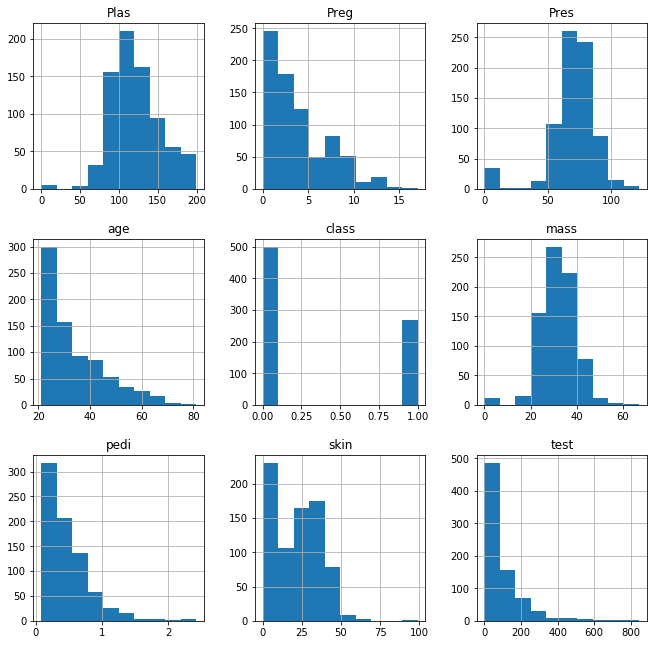

In [32]:
df[df.dtypes[(df.dtypes != "object")].index.values].hist(figsize=[11,11])

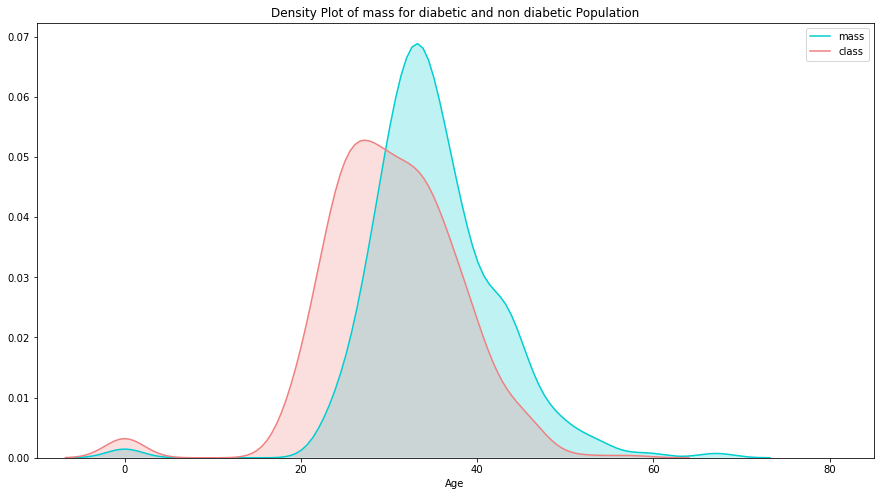

In [18]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["mass"][df["class"] == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["mass"][df["class"] == 0], color="lightcoral", shade=True)
plt.legend(['mass', 'class'])
plt.title('Density Plot of mass for diabetic and non diabetic Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

There are '0's in the data. Are they really valid '0's or they are missing values? Plasma, BP, skin thickness etc. these values 
cannot be 0. look at column by column logically to understand this.

# 4. Replace all the 0s in the column with the median of the same column value accordingly.

In [33]:
df['Pres'] = df['Pres'].replace({0: df['Pres'].mean()})
df['Plas'] = df['Plas'].replace({0: df['Plas'].median()})
df['pedi'] = df['pedi'].replace({0: df['pedi'].median()})
df['skin'] = df['skin'].replace({0: df['skin'].median()})
df['test'] = df['test'].replace({0: df['test'].median()})
df['mass'] = df['mass'].replace({0: df['mass'].median()})



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC36AE16D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AC36D5A470>]], dtype=object)

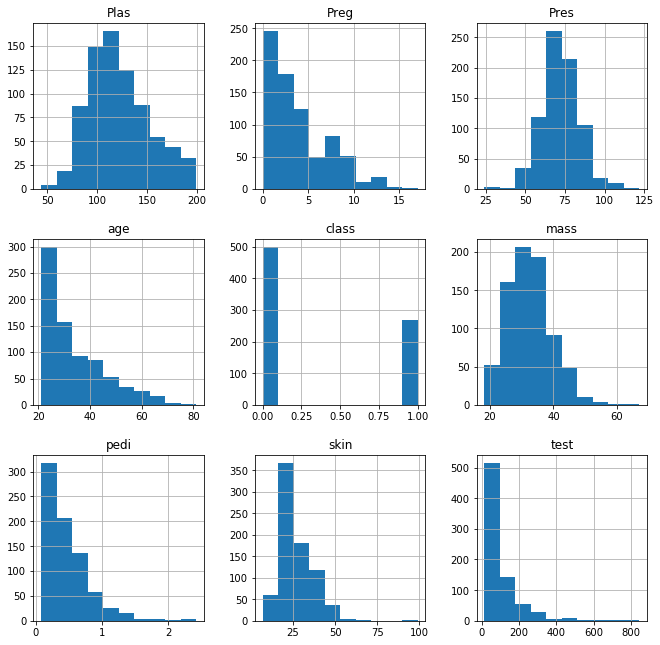

In [34]:
df[df.dtypes[(df.dtypes != "object")].index.values].hist(figsize=[11,11])

# 5. Print the descriptive statistics of each & every column using describe() function

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 6. See the distribution of 'Class' variable and plot it using appropriate graph

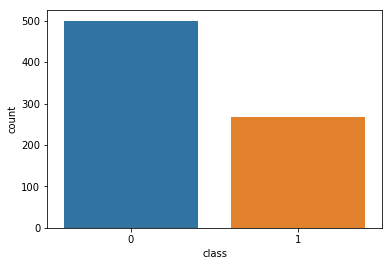

In [36]:
sns.countplot(x='class',data=df)

In [116]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(df,df.columns)

Preg -6.5 13.5 0.0 13.0
Plas 39.0 201.0 67.67 196.0
Pres 40.0 104.0 44.0 106.0
skin 9.5 45.5 10.0 51.33
test -114.625 272.375 24.34 519.9
mass 13.85 50.25 19.5 50.759
pedi -0.33 1.2 0.09468 1.69833
age -1.5 66.5 21.0 67.0
class -1.5 2.5 0.0 1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC36D2D828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AC39B62BA8>]], dtype=object)

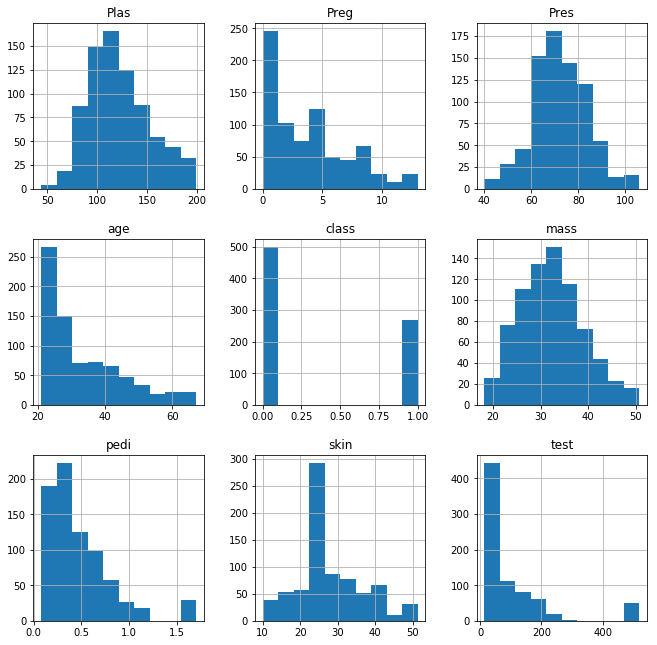

In [117]:
df[df.dtypes[(df.dtypes != "object")].index.values].hist(figsize=[11,11])

# 7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

Check for correlation between variables whose values are >0.8

# 8. Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).

In [118]:
target = 'class'
X = df.loc[:, df.columns!=target]
y = df.loc[:, df.columns==target]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# 9. Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [120]:
from sklearn.tree import DecisionTreeClassifier

decision_clf1 = DecisionTreeClassifier(criterion='entropy',random_state=77)
decision_clf1.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=77, splitter='best')

# 10. Print the accuracy of the model & print the confusion matrix

In [121]:
from sklearn.metrics import accuracy_score

y_pred_dt = decision_clf1.predict(X_test)
print(accuracy_score(y_train, decision_clf1.predict(X_train)))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

1.0


0.75324675324675328

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dt)

array([[119,  31],
       [ 26,  55]])

# 11. Apply the Random forest model and print the accuracy of Random forest Model

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf_fit = RandomForestClassifier(n_estimators=100,criterion='entropy',oob_score=True,random_state=77)
rf_fit.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=77,
            verbose=0, warm_start=False)

In [129]:
y_pred_rf = rf_fit.predict(X_test)
print(accuracy_score(y_train, rf_fit.predict(X_train)))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

1.0


0.77056277056277056

In [130]:
rf_fit.oob_score_

0.75046554934823095

In [131]:
confusion_matrix(y_test, y_pred_rf)

array([[124,  26],
       [ 27,  54]])

# 12. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [132]:
from sklearn.ensemble import AdaBoostClassifier
ada_fit= AdaBoostClassifier(random_state=77,n_estimators=100)
ada_fit.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=77)

In [133]:
y_pred_ada = ada_fit.predict(X_test)
print(accuracy_score(y_train, ada_fit.predict(X_train)))
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_ada

0.849162011173


0.72294372294372289

In [134]:
confusion_matrix(y_test, y_pred_ada)

array([[118,  32],
       [ 32,  49]])

# 13. Apply Bagging Classifier Algorithm and print the accuracy.

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bag_clf = BaggingClassifier(LogisticRegression(C=1),random_state=77,n_estimators=100,oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=77, verbose=0, warm_start=False)

In [136]:
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_train, bag_clf.predict(X_train)))
accuracy_bag = accuracy_score(y_test, y_pred_bag)
accuracy_bag

0.759776536313


0.76190476190476186

In [137]:
bag_clf.oob_score_

0.75605214152700184

In [138]:
confusion_matrix(y_test, y_pred_bag)

array([[132,  18],
       [ 37,  44]])

# 14. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier()
# clf.fit(X_train, y_train)
gdb_fit= GradientBoostingClassifier(random_state=77,n_estimators=100)
gdb_fit.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=77,
              subsample=1.0, verbose=0, warm_start=False)

In [140]:
y_pred_gdb = gdb_fit.predict(X_test)
print(accuracy_score(y_train, gdb_fit.predict(X_train)))
accuracy_gdb = accuracy_score(y_test, y_pred_gdb)
accuracy_gdb

0.938547486034


0.73593073593073588